Let's step back a bit to understand the intuition of Word Embedding.

Recall the question we asked in the previous section: how can we represent a word in a way that a computer can understand?

## ASCII

If you know a bit about computer science, you might have heard of ASCII. ASCII is a character encoding standard for electronic communication. It assigns a number to each character in the alphabet, and it is a way for computers to store and manipulate text.

In [ ]:
import pandas as pd

df = pd.DataFrame()
for i in range(32, 127):
    df = df.append({'ascii': i, 'char': chr(i)}, ignore_index=True)
df.head(50)

,ascii,char
0,32.0,
1,33.0,!
2,34.0,""""
3,35.0,#
4,36.0,$
5,37.0,%
6,38.0,&
7,39.0,'
8,40.0,(
9,41.0,)


In [ ]:
# convert "Hello" to ascii array
ascii_array = [ord(c) for c in "Hello"]
ascii_array

[72, 101, 108, 108, 111]

So, "Hello" is stored as vector $$[72, 101, 108, 108, 111]$$ in ASCII.

### Problems with ASCII for NLP

ASCII is a very simple way to represent text. However, it has a few problems:

- It **does not capture the meaning of words**. For example, "good" and "great" are very similar in meaning, but they are represented by very different vectors in ASCII.

- It **does not capture the relationship between words**. For example, "good" and "bad" are antonyms, but they are represented by very different vectors in ASCII.

## One hot encoding

Another traditional ways to represent words as vectors is to use a one hot encoding, and we'll learn how word embeddings are an improvement to this approach. A one hot encoding is a vector that is 0 in all dimensions except 1 in a single dimension. In this case, the dimensionality of the vector is the same as the number of words in the vocabulary.

Let's see an example. Say we have the following sentence:

$$ \text{sentence} = \text{"the cat sat on the mat"} $$

The vocabulary of this sentence is:

$$ \text{vocabulary} = \{ \text{"the"}, \text{"cat"}, \text{"sat"}, \text{"on"}, \text{"mat"} \} $$
(notice that "the" appears twice in the sentence, but it is only counted once in the vocabulary)

To represent each word we would have a vector of length 5 (the size of the vocabulary) and just take the index of the word in the vocabulary and set that index to 1 and the rest to 0.


$$ \text{"cat"} = [0, 1, 0, 0, 0] $$

$$ \text{"mat"} = [0, 0, 0, 0, 1] $$

$$ \text{"the"} = [1, 0, 0, 0, 0] $$

As you can see, the concept of one hot encoding is very simple: A word would only be represented by a 1 in the position of its index in the vocabulary and 0 in all other positions.

### One hot encoding in Python

Let's try to implement this in Python. First we need to tokenize the sentence. We can use the `split` function to split the sentence into words.

In [ ]:
import numpy as np

def create_encoding_dict(vocabs: set) -> dict:
    result = {}
    for i, word in enumerate(vocabs):
        result[word] = np.zeros(len(vocabs))
        result[word][i] = 1

    return result

create_encoding_dict({'hello', 'world', 'good', 'morning'})

{'morning': array([1., 0., 0., 0.]),
 'world': array([0., 1., 0., 0.]),
 'hello': array([0., 0., 1., 0.]),
 'good': array([0., 0., 0., 1.])}

That's it, now we have the mapping dictionary. Let's use it to encode the sentence.

### Encode a sentence

Now, we know how to encode a given vocabs.

That encoding can be used to encode a sentence.

In [ ]:
encoding_dict = create_encoding_dict({'hello', 'world', 'good', 'morning', 'afternoon', 'night'})
encoding_dict

{'night': array([1., 0., 0., 0., 0., 0.]),
 'hello': array([0., 1., 0., 0., 0., 0.]),
 'good': array([0., 0., 1., 0., 0., 0.]),
 'afternoon': array([0., 0., 0., 1., 0., 0.]),
 'world': array([0., 0., 0., 0., 1., 0.]),
 'morning': array([0., 0., 0., 0., 0., 1.])}

In [ ]:
def encode_sentence(sentence: str, encoding_dict: dict) -> list:
    result = []
    for word in sentence.split():
        result.append(encoding_dict[word])
    return result

encoded_sentence = encode_sentence('hello world', encoding_dict)
encoded_sentence

[array([0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0.])]

So $\text{"hello world"}$ is encoded as matrix

$$
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

In [ ]:
encode_sentence("hello good morning", encoding_dict)

[array([0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1.])]

So $\text{"hello good morning"}$ is encoded as matrix

$$
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

### Decode a sentence

But how to decode a sentence?

Easy, we just need to reverse the encoding.

In [ ]:
def decode_sentence(sentence: list, encoding_dict: dict) -> str:
    result = []
    for word in sentence:
        result.append(list(encoding_dict.keys())[np.argmax(word)])
    return ' '.join(result)

encoded_sentence = encode_sentence("hello good morning", encoding_dict)
decode_sentence(encoded_sentence, encoding_dict)


'hello good morning'

### The problem of one hot encoding

One hot encoding is a very simple way to encode words. However, it has a few problems:

1. The dimensionality of the vectors is the same as the number of words in the vocabulary.

    If the vocabulary is 10,000 words then each word is represented by a vector of length 10,000. If we have a 10,000 vocabs, to encode "hello" we need to have a vector of 10,000 elements, and only one of them is 1.

    $$
    encode("hello") = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..., 0, 0, 0, 0, 0]
    $$

    You can see also how "wasteful" this is. Most of the elements in the vector are zeros, which is the point of the next problem.

2. The vectors are very sparse: Most of the elements in the vector are zeros.

    We can see from the above example, only one element is 1, and the rest are 0. This is very wasteful, and it's also very hard to train a model on such sparse vectors because, as we've learned, it will be very resistant to the curse of dimensionality.

3. The vectors are independent. There is no relationship between the vectors

    $$
    encode("king") = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..., 0, 0, 0, 0, 0] \\
    encode("raja") = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
    $$

    Using basic one hot encoding, we can't tell that "king" and "ruler" are similar, and so when we train our model on a sentence such as:

    > "The king conquered the land"

    We can't use that learning to complete the sentence:

    > "The ruler conquered the ..."

    because the model doesn't know that "king" and "ruler" are similar.



## Word Embedding Superiority

We've learned word embedding before, but let's try to understand why it's superior to one hot encoding.

1. The vectors are smaller, a lot smaller.

2. The vectors are dense.

3. The vectors are related. There is a relationship between the vectors

Word embeddings have the advantage of capturing semantic relationships between words. In a trained word embedding model, words that are semantically related have similar representations—i.e., their vectors are closer to each other in the vector space. This allows the model to capture patterns like:

- Synonyms (words with similar meanings have similar vectors)
- Analogies (relationships like 'king' to 'queen' as 'man' to 'woman')
- Thematic relationships (e.g., 'Paris', 'Rome' and 'Berlin' might all considered similar, reflecting their shared characteristic as European capitals).
- And more

### Vector

Before we dive into word embedding, let's first understand what a vector is.

Vector is a mathematical object that has both a **magnitude** and a **direction**. For example, the velocity of a moving object is a vector. It has a magnitude (the speed of the object) and a direction (the direction in which the object is moving).

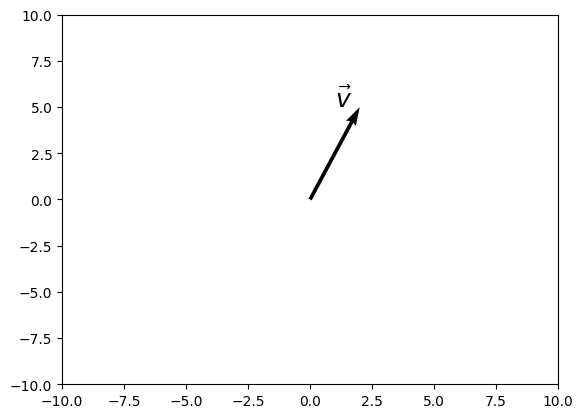

In [ ]:
# Draw a vector of (2, 5)

import matplotlib.pyplot as plt
import numpy as np

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.text(1, 5, r'$\vec{v}$', size=18)
plt.show()

Remember, it has both a magnitude and a direction.

Let's draw another vector.

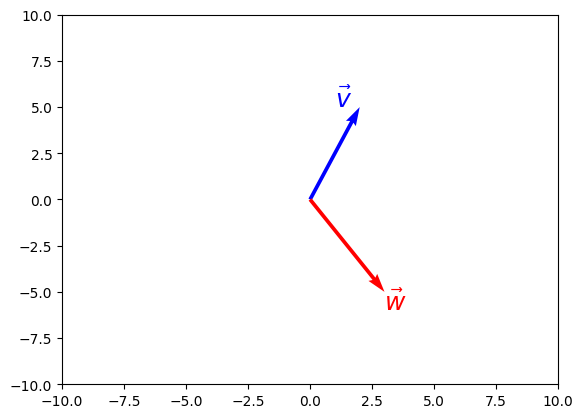

In [ ]:
# Draw 2 vectors with the same magnitude but different directions

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1, color='blue')
plt.text(1, 5, r'$\vec{v}$', size=18, color='blue')
plt.quiver(0, 0, 3, -5, angles='xy', scale_units='xy', scale=1, color='red')
plt.text(3, -6, r'$\vec{w}$', size=18, color='red')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

Mathematically, vector can be represented as a list of numbers (or with vector notation).

Write those two vector in Latex

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$$
$$
\vec{w} = \begin{bmatrix} 3 \\ -5 \end{bmatrix}
$$

Those vectors have different magnitudes and directions.

The first element of the vector is the magnitude of the vector in the x direction, and the second element is the magnitude of the vector in the y direction.

Let's break down the vector $\vec{v}$.

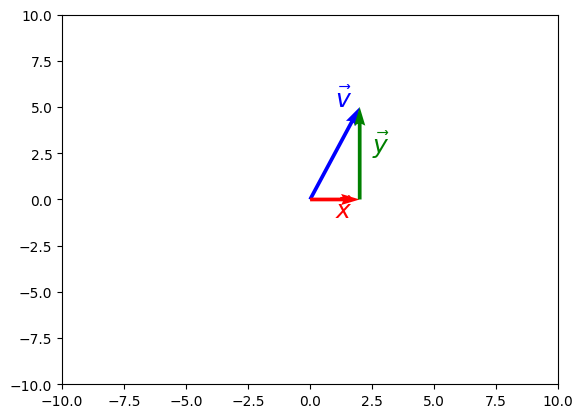

In [ ]:
import matplotlib.pyplot as plt

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1, color='blue')
plt.text(1, 5, r'$\vec{v}$', size=18, color='blue')

# break it down into two vectors: x and y
plt.quiver(0, 0, 2, 0, angles='xy', scale_units='xy', scale=1, color='red')
plt.text(1, -1, r'$\vec{x}$', size=18, color='red')
plt.quiver(2, 0, 0, 5, angles='xy', scale_units='xy', scale=1, color='green')
plt.text(2.5, 2.5, r'$\vec{y}$', size=18, color='green')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()


So

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$$

is actually the sum of two vectors:

$$
\vec{x} = \begin{bmatrix} 2 \\ 0 \end{bmatrix}
$$

and

$$
\vec{y} = \begin{bmatrix} 0 \\ 5 \end{bmatrix}
$$

#### Vector addition

So to add two vectors, we just need to add the elements of the vectors.

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 5 \end{bmatrix} = \vec{x} + \vec{y}
$$

Let's try another example:

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix} + \begin{bmatrix} 3 \\ -5 \end{bmatrix} = \begin{bmatrix} 5 \\ 0 \end{bmatrix}
$$


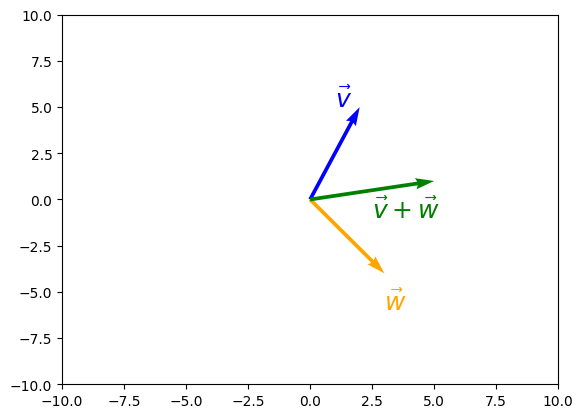

In [ ]:
## Draw two vectors and their sum

import matplotlib.pyplot as plt

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1, color='blue')
plt.text(1, 5, r'$\vec{v}$', size=18, color='blue')

plt.quiver(0, 0, 3, -4, angles='xy', scale_units='xy', scale=1, color='orange')
plt.text(3, -6, r'$\vec{w}$', size=18, color='orange')

plt.quiver(0, 0, 5, 1, angles='xy', scale_units='xy', scale=1, color='green')
plt.text(2.5, -1, r'$\vec{v} + \vec{w}$', size=18, color='green')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

#### Vector magnitude

Recall that vector has both a magnitude and a direction.

So, how do we calculate the magnitude of a vector?

The magnitude of a vector is the length of the vector.


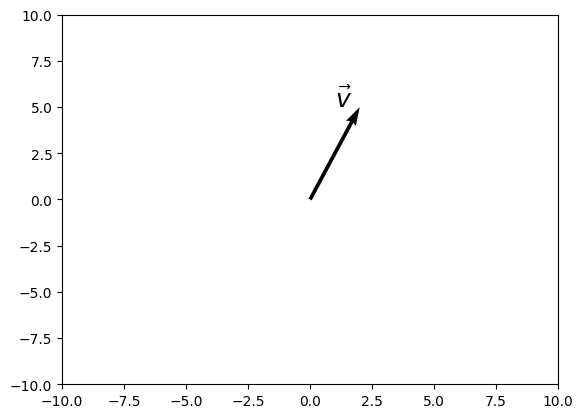

In [ ]:
import matplotlib.pyplot as plt

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1)
plt.text(1, 5, r'$\vec{v}$', size=18)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

How to calculate that length?

Remember Pythagorean theorem? :)

We just need to break down the vector into its components, and then use Pythagorean theorem to calculate the length.

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$$

The magnitude is
$$
\sqrt{2^2 + 5^2} = \sqrt{4 + 25} = \sqrt{29}
$$

We can write the magnitude using $||\vec{v}||$. notation

$$
||\vec{v}|| = \sqrt{2^2 + 5^2} = \sqrt{4 + 25} = \sqrt{29}
$$

### Vector dot product

Vector dot product is a way to multiply vectors together.

The dot product of two vectors is the sum of the products of the corresponding elements of the two vectors.

$$
\vec{v} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$$

$$
\vec{w} = \begin{bmatrix} 3 \\ -5 \end{bmatrix}
$$

$$
\vec{v} \cdot \vec{w} = 2 \times 3 + 5 \times (-5) = -19
$$

Formally, the dot product is defined as:

$$
\vec{v} \cdot \vec{w} = \sum_{i=1}^{n} v_i w_i
$$

The output is a scalar.

So what is the use of dot product?

One of the use is to calculate the angle between two vectors.



### Finding the angle between two vectors

We can use the dot product to find the angle between two vectors.

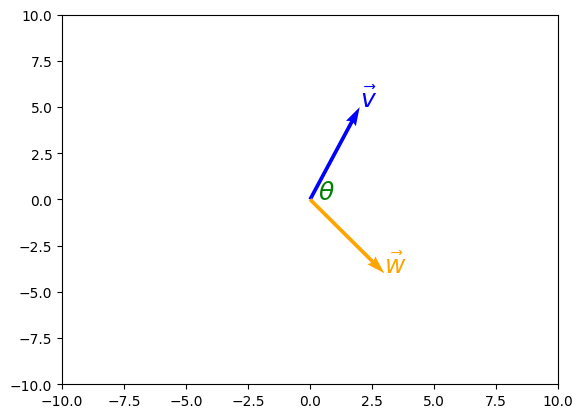

In [ ]:
## Draw two vectors and their difference

import matplotlib.pyplot as plt

plt.quiver(0, 0, 2, 5, angles='xy', scale_units='xy', scale=1, color='blue')
plt.text(2, 5, r'$\vec{v}$', size=18, color='blue')

plt.quiver(0, 0, 3, -4, angles='xy', scale_units='xy', scale=1, color='orange')
plt.text(3, -4, r'$\vec{w}$', size=18, color='orange')

# draw arc line for the angle between two vectors
from matplotlib.patches import Arc
plt.text(0.3, 0, r'$\theta$', size=18, color='green')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

How to calculate $\theta$?

Remember, the dot product equation?

It's in fact can be used to calculate the angle between two vectors.

$$
\vec{v} \cdot \vec{w} = ||\vec{v}|| \times ||\vec{w}|| \times \cos(\theta)
$$

We omit the derivation here, but you can find it in the [wikipedia page](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition).

From the above equation, we can calculate the angle between two vectors.

$$
\theta = \cos^{-1} \left( \frac{\vec{v} \cdot \vec{w}}{||\vec{v}|| \times ||\vec{w}||} \right)
$$

Usually we don't need to calculate the angle directly, but we can use the dot product to calculate the cosine similarity between two vectors.

$$
\cos{\theta} = \frac{\vec{v} \cdot \vec{w}}{||\vec{v}|| \times ||\vec{w}||}
$$

- When two vectors are similar, the angle between them is small, and the cosine similarity is 1.
- When two vectors are dissimilar, the angle between them is large, and the cosine similarity is 0.
- When two vectors are opposite, the angle between them is 180 degrees, and the cosine similarity is -1.

Why do we care about cosine similarity? We will see later in Word Embedding :)

#### 3D Vector

So far we've only seen 2D vectors. But what about 3D vectors?

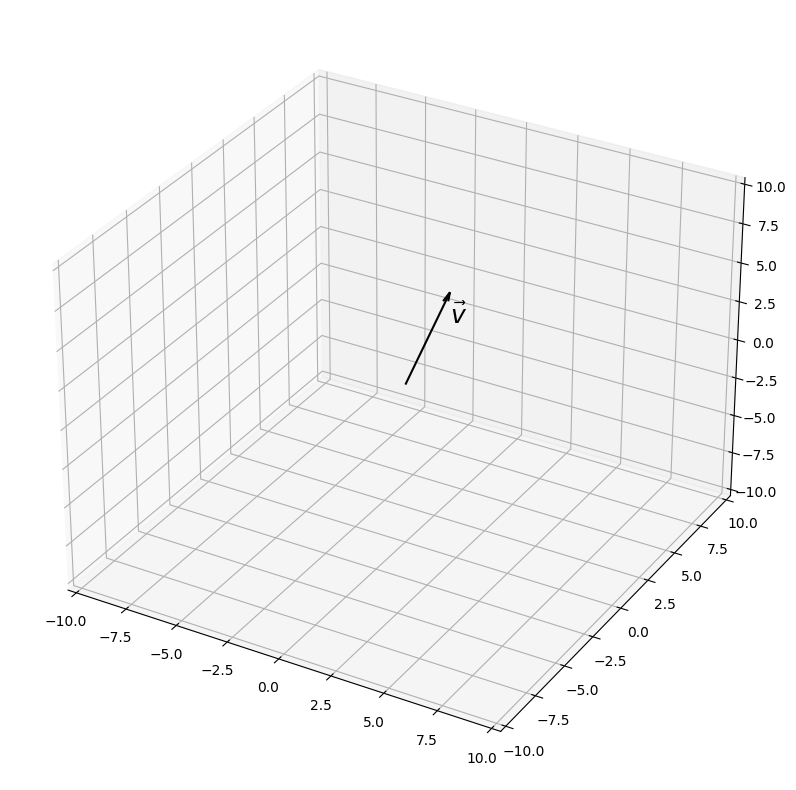

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, 1, 2, 5, arrow_length_ratio=0.1, colors='black')
ax.text(1, 2, 3, r'$\vec{v}$', size=18)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.show()

It's hard to visualize 3D vectors, but the concept is the same:

We have the magnitude and the direction.

$$
\vec{v} = \begin{bmatrix} 1 \\ 2 \\ 5 \end{bmatrix}
$$

The magnitude is
$$
||\vec{v}|| = \sqrt{1^2 + 2^2 + 5^2} = \sqrt{1 + 4 + 25} = \sqrt{30}
$$

#### Multidimensional Vector

We can also have vectors with more than 3 dimensions.

$$
\vec{v} = \begin{bmatrix} 1 \\ 2 \\ 5 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \\ 9 \\ 10 \end{bmatrix}
$$

It has 10 dimensions. But - since we live in a 3D world - it's hard to visualize vectors with more than 3 dimensions ヽ（・＿・；)ノ

### What is Word Embedding?

Let's get back to word embedding.

Word embedding is a way to represent words as **vectors**

So, word $\text{"cat"}$ could be represented as vector $\vec{v}$

$$
\vec{v} = \begin{bmatrix} 1.5 \\ 2.2 \\ 5.5 \\ ... \\ 2.5 \end{bmatrix}
$$

and word $\text{"dog"}$ could be represented as vector $\vec{w}$

$$
\vec{w} = \begin{bmatrix} 2.5 \\ 3.2 \\ 4.5 \\ ... \\ 1.5 \end{bmatrix}
$$

Yes, it's just a vector and it's multidimensional.

In [ ]:
# URL of GloVe embeddings and the path - replace with your actual URL
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
path = 'glove.6B.300d.txt'

# download the url above if not exist
import os
import urllib.request
if not os.path.exists(path):
    import urllib.request
    urllib.request.urlretrieve(url, path)

# load into GenSim
import gensim
wv = gensim.models.KeyedVectors.load_word2vec_format(path, binary=False, no_header=True)
wv

In [ ]:
wv['cat']

array([-3.3712e-01, -2.1691e-01, -6.6365e-03, -4.1625e-01, -1.2555e+00,
       -2.8466e-02, -7.2195e-01, -5.2887e-01,  7.2085e-03,  3.1997e-01,
        2.9425e-02, -1.3236e-02,  4.3511e-01,  2.5716e-01,  3.8995e-01,
       -1.1968e-01,  1.5035e-01,  4.4762e-01,  2.8407e-01,  4.9339e-01,
        6.2826e-01,  2.2888e-01, -4.0385e-01,  2.7364e-02,  7.3679e-03,
        1.3995e-01,  2.3346e-01,  6.8122e-02,  4.8422e-01, -1.9578e-02,
       -5.4751e-01, -5.4983e-01, -3.4091e-02,  8.0017e-03, -4.3065e-01,
       -1.8969e-02, -8.5670e-02, -8.1123e-01, -2.1080e-01,  3.7784e-01,
       -3.5046e-01,  1.3684e-01, -5.5661e-01,  1.6835e-01, -2.2952e-01,
       -1.6184e-01,  6.7345e-01, -4.6597e-01, -3.1834e-02, -2.6037e-01,
       -1.7797e-01,  1.9436e-02,  1.0727e-01,  6.6534e-01, -3.4836e-01,
        4.7833e-02,  1.6440e-01,  1.4088e-01,  1.9204e-01, -3.5009e-01,
        2.6236e-01,  1.7626e-01, -3.1367e-01,  1.1709e-01,  2.0378e-01,
        6.1775e-01,  4.9075e-01, -7.5210e-02, -1.1815e-01,  1.86

That's the vector of the word "cat". How many dimensions does it have?

In [ ]:
wv['cat'].shape

(300,)

How about tiger?

In [ ]:
wv['tiger']

array([ 3.1805e-01,  3.8612e-01,  1.0725e-01,  2.8261e-01, -4.4965e-02,
        1.0612e-02,  4.3426e-01,  1.1006e+00,  1.5124e-01, -7.5199e-01,
        5.4254e-01, -2.5544e-01, -1.6400e-01,  1.6128e-01, -1.7060e-02,
       -2.2410e-01,  1.2682e-01,  8.4087e-01, -2.7631e-01,  4.4310e-02,
        2.6123e-01, -3.8948e-02, -1.4925e-01, -6.0481e-01, -1.1059e+00,
       -1.1135e-01, -5.9403e-02, -2.2909e-01,  6.7889e-01,  1.8288e-01,
        6.9610e-02, -1.3831e+00,  5.7360e-02, -3.3441e-01, -2.6577e-01,
       -3.4069e-01,  1.7086e-01,  5.9148e-01, -8.3631e-01,  4.8743e-01,
        2.4388e-01, -4.2785e-01,  3.9639e-01, -1.8224e-01, -3.1574e-01,
       -4.1929e-01,  4.3294e-01, -3.1500e-01, -2.3390e-01, -9.5833e-03,
        9.6671e-01, -1.8473e-01,  1.5179e-01,  3.5956e-01, -5.4430e-02,
        2.4032e-01, -1.7691e-02,  1.0346e+00, -2.3621e-01, -4.6284e-02,
       -6.3183e-01, -2.6131e-01,  2.2495e-01,  6.5933e-01,  9.7632e-02,
       -1.4428e-01, -5.1098e-01, -6.4340e-01,  2.2279e-01,  4.70

Remember the cosine similarity?

What if we do the dot product between the vector of "cat" and "tiger"?

In [ ]:
# cosine similarity of cat and tiger
import numpy as np
np.dot(wv['cat'], wv['tiger']) / (np.linalg.norm(wv['cat']) * np.linalg.norm(wv['tiger']))

0.31289068

It represents the similarity between "cat" and "tiger".
But how to interpret the result?

Let's calculate the cosine similarity between "cat" and "cat"

In [ ]:
np.dot(wv['cat'], wv['cat']) / (np.linalg.norm(wv['cat']) * np.linalg.norm(wv['cat']))

1.0

It's 1. Remember that cosine similarity is 1 when two vectors are similar.

In [ ]:
a = "cat"
b = ["cat", "dog", "woman", "cute", "scary", "computer", "economy", "america", "japan", "pet", "bad"]

# create pandas dataframe, first column: word, second column: cosine similarity
import pandas as pd
df = pd.DataFrame()

for word in b:
    df = df.append({'word': word, 'cosine_similarity': np.dot(wv[a], wv[word]) / (np.linalg.norm(wv[a]) * np.linalg.norm(wv[word]))}, ignore_index=True)

# sort by cosine similarity
df.sort_values(by='cosine_similarity', ascending=False)



,word,cosine_similarity
0,cat,1.000000
1,dog,0.681675
9,pet,0.587037
3,cute,0.339551
2,woman,0.288396
10,bad,0.247380
5,computer,0.204328
4,scary,0.177671
7,america,0.123796
8,japan,0.079736


Interesting, right? Now we know why cosine similarity is useful

Oh ya, instead of calculating cosine similarity manually, we can use `similarity` function from `gensim` library :)

In [ ]:
wv.similarity("king", "ruler")

0.48487008

In [ ]:
wv.similarity("king", "queen")

0.63364697

We can also list down the most similar words to a given word using `most_similar` function.

In [ ]:
wv.most_similar("king")

[('queen', 0.6336469054222107),
 ('prince', 0.6196622252464294),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791266560554504),
 ('throne', 0.5606487393379211),
 ('ii', 0.5562329888343811),
 ('iii', 0.5503198504447937),
 ('crown', 0.5224862098693848),
 ('reign', 0.5217353701591492),
 ('kings', 0.5066401362419128)]

### Interesting properties of word embedding

Word embedding has some interesting properties.

Let's see some examples.

$$King - Queen = Man - ...$$

read as: the differences (minus) between King and Queen is similar to the difference between Man and what?

To answer that, just do simple arithmetic.

$$
King - Queen = Man - x\\
x = Man + Queen - King
$$

Which can be implemented in Python as:


In [ ]:
wv.most_similar(positive=['man', 'queen'], negative=['king'])

[('woman', 0.6957679986953735),
 ('girl', 0.5603842735290527),
 ('person', 0.5134302973747253),
 ('she', 0.4802548587322235),
 ('mother', 0.4633125066757202),
 ('boy', 0.46078377962112427),
 ('lady', 0.45522934198379517),
 ('teenager', 0.45107489824295044),
 ('her', 0.4438043534755707),
 ('men', 0.4426511526107788)]

$$
Strong - Stronger = Weak - ...
$$

In [ ]:
wv.most_similar(positive=['weak', 'stronger'], negative=['strong'])

[('weaker', 0.790091872215271),
 ('weakened', 0.5707376003265381),
 ('weakening', 0.5706116557121277),
 ('sluggish', 0.5251186490058899),
 ('weaken', 0.5133482217788696),
 ('worse', 0.505226194858551),
 ('weakness', 0.501374363899231),
 ('slower', 0.4901147186756134),
 ('significantly', 0.48916390538215637),
 ('cheaper', 0.4886264503002167)]

In [ ]:
wv.most_similar(positive=['fast', 'stronger'], negative=['strong'])

[('faster', 0.7575436234474182),
 ('quicker', 0.6800161004066467),
 ('slower', 0.6144760847091675),
 ('harder', 0.5210117101669312),
 ('easier', 0.5203530192375183),
 ('pace', 0.5148283839225769),
 ('slow', 0.5114564895629883),
 ('cheaper', 0.4829019606113434),
 ('better', 0.4786846339702606),
 ('rapidly', 0.44480517506599426)]

$$
Indonesia - Jakarta = Japan - ...
$$

In [ ]:
wv.most_similar(positive=['japan', 'jakarta'], negative=['indonesia'])

[('tokyo', 0.8145835995674133),
 ('japanese', 0.655620276927948),
 ('seoul', 0.6100760102272034),
 ('osaka', 0.569068193435669),
 ('kyodo', 0.5087528824806213),
 ('hashimoto', 0.457542359828949),
 ('shimbun', 0.4574349522590637),
 ('manila', 0.45497873425483704),
 ('koizumi', 0.45251786708831787),
 ('nikkei', 0.4397467374801636)]

$$ Japan - Kimono = Indonesia - ... $$

In [ ]:
wv.most_similar(positive=['indonesia', 'kimono'], negative=['japan'])

[('batik', 0.55389803647995),
 ('bathrobe', 0.44231539964675903),
 ('robe', 0.42582112550735474),
 ('sashes', 0.4215601980686188),
 ('sarongs', 0.41601523756980896),
 ('balinese', 0.41500627994537354),
 ('frock', 0.41402822732925415),
 ('tunic', 0.41291648149490356),
 ('saree', 0.4119526147842407),
 ('drapes', 0.41082924604415894)]

$$ Eat - Ate = Drink - ... $$

In [ ]:
wv.most_similar(positive=['drink', 'ate'], negative=['eat'])

[('drank', 0.8188783526420593),
 ('drinks', 0.7133989334106445),
 ('sipped', 0.5968326330184937),
 ('beer', 0.5672910213470459),
 ('drinking', 0.5617578625679016),
 ('beverage', 0.5377948880195618),
 ('vodka', 0.5361367464065552),
 ('beverages', 0.5348184704780579),
 ('soda', 0.5245417356491089),
 ('sipping', 0.5153992176055908)]

Cool isn't it?

But how to create embedding? Let's find out in the next lesson